In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
sc = StandardScaler()
sc.fit(data)
scaled_data = sc.transform(data)

In [5]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
features_pca = pca.transform(scaled_data)

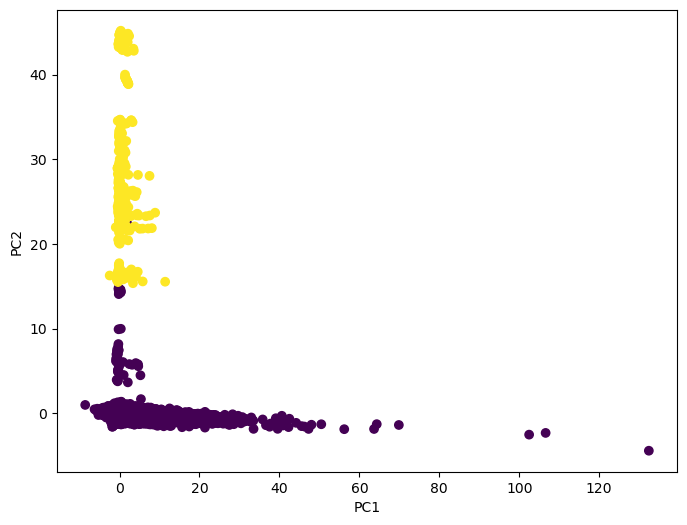

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1],c=data['Class'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [10]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

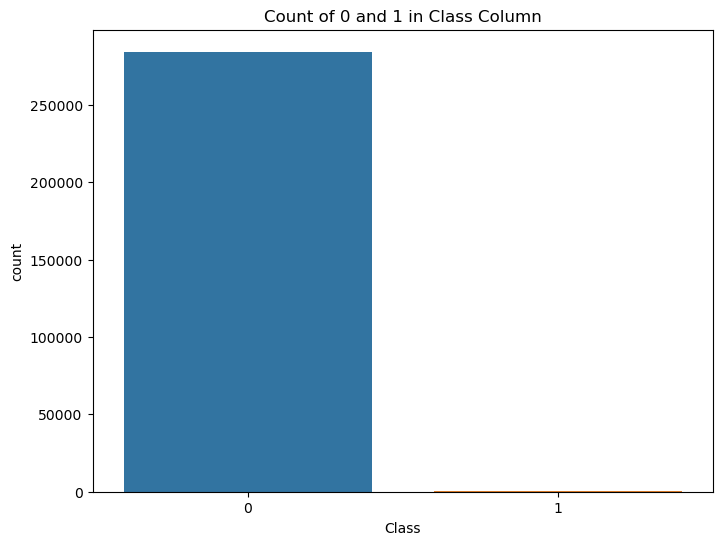

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Class')
plt.title('Count of 0 and 1 in Class Column')
plt.show()

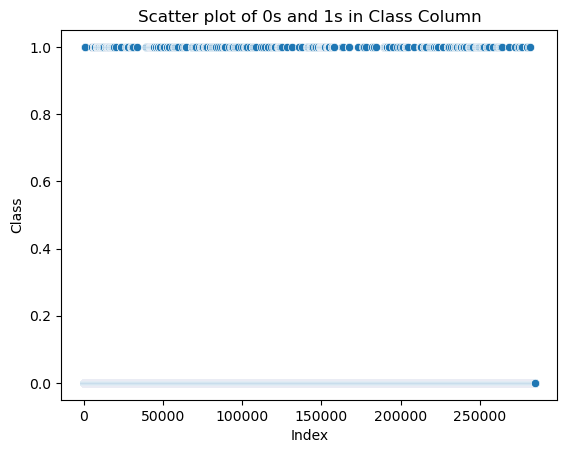

In [13]:
sns.scatterplot(data=data, x=data.index, y='Class')
plt.title('Scatter plot of 0s and 1s in Class Column')
plt.xlabel('Index')
plt.show()

In [14]:
pca.components_

array([[-0.03025003, -0.17381742, -0.39065628, -0.14496755,  0.07774916,
        -0.2915301 ,  0.16024772,  0.2867568 , -0.07523859, -0.03390235,
        -0.07936562,  0.00944248, -0.01479942,  0.0060045 ,  0.02340112,
         0.00349377, -0.00678162,  0.00271978,  0.02076172, -0.04167324,
         0.25212656,  0.07673082, -0.0523963 , -0.08444646,  0.00283402,
        -0.02778609, -0.00123422,  0.02235957,  0.00824677,  0.70651541,
         0.01487041],
       [-0.20706184, -0.12765548,  0.10313484, -0.05616415,  0.15478996,
        -0.12449511, -0.02848137, -0.21297486,  0.02849055, -0.08558225,
        -0.20924516,  0.20967406, -0.27974206,  0.0153041 , -0.25661625,
         0.05161195, -0.186146  , -0.28022739, -0.12989742,  0.02390637,
         0.02731687,  0.01910238, -0.04243677, -0.0110246 , -0.0047095 ,
         0.06955404,  0.01751219,  0.01722771,  0.01245503, -0.01932976,
         0.67740181]])

In [15]:
df_pca_components = pd.DataFrame(pca.components_, columns=data.columns)

In [17]:
df_pca_components

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.030250,-0.173817,-0.390656,-0.144968,0.077749,-0.291530,0.160248,0.286757,-0.075239,-0.033902,...,0.076731,-0.052396,-0.084446,0.002834,-0.027786,-0.001234,0.022360,0.008247,0.706515,0.014870
1,-0.207062,-0.127655,0.103135,-0.056164,0.154790,-0.124495,-0.028481,-0.212975,0.028491,-0.085582,...,0.019102,-0.042437,-0.011025,-0.004709,0.069554,0.017512,0.017228,0.012455,-0.019330,0.677402


<Axes: >

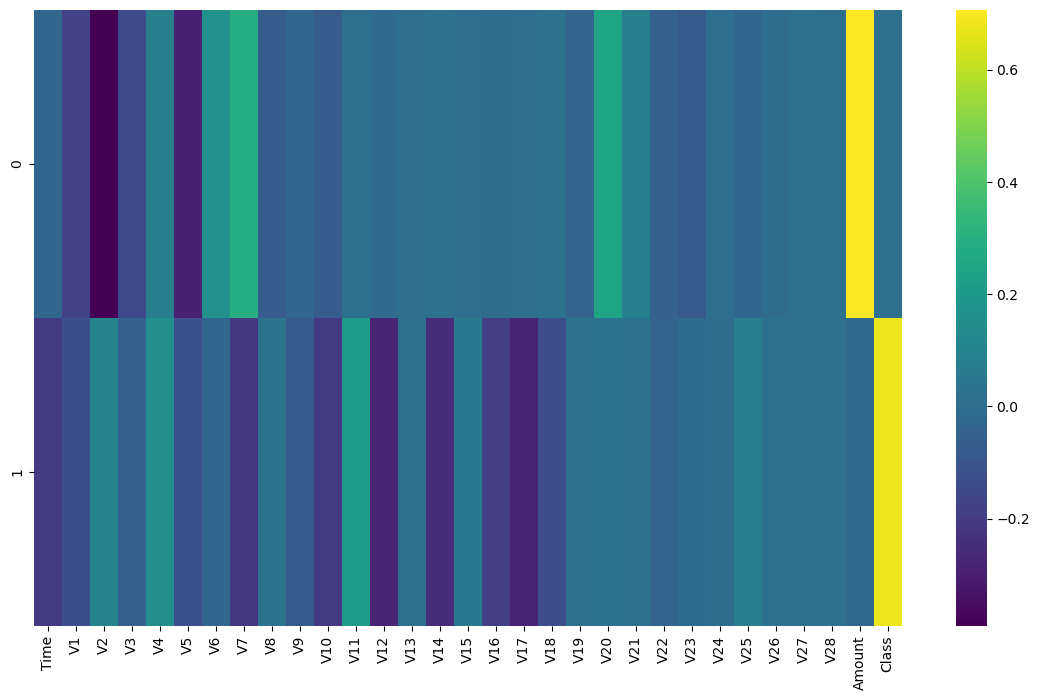

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df_pca_components, cmap='viridis')